# Prosper Loan Data Exploration & Analysis

# Structure of the Dataset
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The vast majority of the 81 variables are quantitative.

A breakdown of the different of what each column variable represents can be found at the following link:
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

## Initial Data Wrangling

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [56]:
df = pd.read_csv('prosperLoanData.csv')

In [57]:
print(df.shape)
pd.set_option('max_columns', None)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [58]:
print(df.shape[1])
df.columns

81


Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**I want to take a look at  the different columns grouped by specific datatype to get an idea of what variables are quantitatively discerete or continous and qualitatively nominal or ordinal. This will assist in mentally mapping out what visualizations might be useful for analysis later on.**

In [60]:
# Columns that are of type integer
list(df.select_dtypes(include = 'int64'))

['ListingNumber',
 'Term',
 'ListingCategory (numeric)',
 'OpenRevolvingAccounts',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginalAmount',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'Investors']

In [61]:
# Columns that are of type float
list(df.select_dtypes(include = 'float64'))

['BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaulted

In [62]:
# Columns that are of type object
list(df.select_dtypes(include = 'object'))

['ListingKey',
 'ListingCreationDate',
 'CreditGrade',
 'LoanStatus',
 'ClosedDate',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'GroupKey',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

In [63]:
# Columns that are of type boolean
list(df.select_dtypes(include = 'bool'))

['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable']

## Preliminary Questions  & Features of Interest

1. What factors affect the outcome status of a loan? 


2. What factors most affect a borrower’s APR or interest rate?


3. What do loan outcomes look like based on employment status?


4. Do less favorable employment statuses go for longer term loans?


5. What are the most common loan payment amounts? A bar chart should answer this.


6. Are more loans associated with higher defaults due to say increased debt burden?

Although there are 81 variables in the original dataset they all don't require analysis. Instead what I'll be doing is selecting 15-20 variables of interest (excluding identifier variables) to carry out my analysis on.

Based off of my prior knowledge of loans, borrowing, credit reports and scores, and time in relation to debt I've decided to go with variables related or relevant to each of these along with some variables I'm less familiar with.

**My preliminary colums of interest are:**

1. **ListingKey** - Unique key for each listing, same value as the 'key' used in the listing object in the API.
2. **ListingNumber** - The number that uniquely identifies the listing to the public as displayed on the website.
3. **ListingCreationDate** - The date the listing was created.
4. **LoanOriginalAmount** - The origination amount of the loan.
5. **MonthlyLoanPayment** - The scheduled monthly loan payment.
6. **BorrowerAPR** - The Borrower's Annual Percentage Rate (APR) for the loan. 
7. **Term** - The length of the loan expressed in months.
8. **OpenRevolvingAccounts** - Number of open revolving accounts at the time the credit profile was pulled.
9. **RevolvingCreditBalance** - Dollars of revolving credit at the time the credit profile was pulled.
10. **StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.
11. **DebtToIncomeRatio** - Number of trades opened in the last 6 months at the time the credit profile was pulled. The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). 
12. **Occupation** - The Occupation selected by the Borrower at the time they created the listing.
13. **EmploymentStatus** -The employment status of the borrower at the time they posted the listing.
14. **BorrowerState** - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
15. **TotalProsperLoans** - Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
16. **BankcardUtilization** - The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
17. **LoanStatus** - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
18. **ProsperScore** - The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
19. **CreditGrade** -The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

In [64]:
# Creating a list of specific columns I want to analyze
filtered_cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 
               'BorrowerAPR', 'Term', 'OpenRevolvingAccounts',
               'RevolvingCreditBalance', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 
               'Occupation', 'EmploymentStatus', 'BorrowerState',
               'TotalProsperLoans', 'BankcardUtilization', 'LoanStatus', 'ProsperScore',
               'CreditGrade']

In [65]:
# Creating a dataset filtered down to the column variables I want to analyze
loan_clean = df.loc[:, filtered_cols]

In [66]:
# Previewing the filtered dataset
pd.set_option('max_columns', None)
loan_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,Term,OpenRevolvingAccounts,RevolvingCreditBalance,StatedMonthlyIncome,DebtToIncomeRatio,Occupation,EmploymentStatus,BorrowerState,TotalProsperLoans,BankcardUtilization,LoanStatus,ProsperScore,CreditGrade
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,9425,330.43,0.16516,36,1,0.0,3083.333333,0.17,Other,Self-employed,CO,NaN,0.00,Completed,NaN,C
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,10000,318.93,0.12016,36,13,3989.0,6125.000000,0.18,Professional,Employed,CO,NaN,0.21,Current,7.0,NaN
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,3001,123.32,0.28269,36,0,NaN,2083.333333,0.06,Other,Not available,GA,NaN,NaN,Completed,NaN,HR
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,10000,321.45,0.12528,36,7,1444.0,2875.000000,0.15,Skilled Labor,Employed,GA,NaN,0.04,Current,9.0,NaN
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,15000,563.97,0.24614,36,6,6193.0,9583.333333,0.26,Executive,Employed,MN,1.0,0.81,Current,4.0,NaN


In [67]:
# Taking a look at the entries and datatype information for the columns
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ListingKey              113937 non-null  object 
 1   ListingNumber           113937 non-null  int64  
 2   ListingCreationDate     113937 non-null  object 
 3   LoanOriginalAmount      113937 non-null  int64  
 4   MonthlyLoanPayment      113937 non-null  float64
 5   BorrowerAPR             113912 non-null  float64
 6   Term                    113937 non-null  int64  
 7   OpenRevolvingAccounts   113937 non-null  int64  
 8   RevolvingCreditBalance  106333 non-null  float64
 9   StatedMonthlyIncome     113937 non-null  float64
 10  DebtToIncomeRatio       105383 non-null  float64
 11  Occupation              110349 non-null  object 
 12  EmploymentStatus        111682 non-null  object 
 13  BorrowerState           108422 non-null  object 
 14  TotalProsperLoans   

In [68]:
# Change ListingCreationDate to datetime as it's more appropriate
loan_clean['ListingCreationDate'] = pd.to_datetime(loan_clean['ListingCreationDate'])

**Although it can be reasoned that CreditGrade, EmploymentStatus, and LoanStatus should be ordinal categorical datatypes, there's no explicity clear ranking that Prosper assigns. Converting the three columns to categorical datatypes will suffice though.**

In [69]:
# Taking a look at the value for three qualitative columns that appear to be categories
loan_clean.CreditGrade.unique(), loan_clean.LoanStatus.unique(), loan_clean.EmploymentStatus.unique()

(array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object),
 array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
        'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
        'Past Due (61-90 days)', 'Past Due (31-60 days)',
        'Past Due (91-120 days)', 'FinalPaymentInProgress',
        'Past Due (>120 days)'], dtype=object),
 array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
        nan, 'Not employed', 'Part-time', 'Retired'], dtype=object))

In [161]:
ordinal_vars_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
                     'LoanStatus': ['Chargedoff', 'Defaulted','Past Due (1-15 days)', 'Past Due (16-30 days)',
                               'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
                               'Past Due (>120 days)', 'Current', 'FinalPaymentInProgress','Cancelled', 'Completed']}

for var in ordinal_vars_dict:
    ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_vars_dict[var])
    loan_clean[var] = loan_clean[var].astype(ordered_variable)

In [71]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ListingKey              113937 non-null  object        
 1   ListingNumber           113937 non-null  int64         
 2   ListingCreationDate     113937 non-null  datetime64[ns]
 3   LoanOriginalAmount      113937 non-null  int64         
 4   MonthlyLoanPayment      113937 non-null  float64       
 5   BorrowerAPR             113912 non-null  float64       
 6   Term                    113937 non-null  int64         
 7   OpenRevolvingAccounts   113937 non-null  int64         
 8   RevolvingCreditBalance  106333 non-null  float64       
 9   StatedMonthlyIncome     113937 non-null  float64       
 10  DebtToIncomeRatio       105383 non-null  float64       
 11  Occupation              110349 non-null  object        
 12  EmploymentStatus        111682

In [72]:
loan_clean.CreditGrade.unique()

['C', NaN, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC']
Categories (8, object): ['HR' < 'NC' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

In [73]:
loan_clean['CreditGrade'] = loan_clean['CreditGrade'].astype('category')
loan_clean['EmploymentStatus'] = loan_clean['EmploymentStatus'].astype('category')
loan_clean['LoanStatus'] = loan_clean['LoanStatus'].astype('category')

In [74]:
# The BorrowerState variable should also be categorical
loan_clean['BorrowerState'] = loan_clean['BorrowerState'].astype('category')

In [75]:
# A simple datatype check for assurance
loan_clean.BorrowerState.dtype

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
                  'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
                  'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
                  'WY'],
, ordered=False)

## Assessing For Missing Data & Any Errors

In [76]:
# Re-checking the variable datatypes and entries
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ListingKey              113937 non-null  object        
 1   ListingNumber           113937 non-null  int64         
 2   ListingCreationDate     113937 non-null  datetime64[ns]
 3   LoanOriginalAmount      113937 non-null  int64         
 4   MonthlyLoanPayment      113937 non-null  float64       
 5   BorrowerAPR             113912 non-null  float64       
 6   Term                    113937 non-null  int64         
 7   OpenRevolvingAccounts   113937 non-null  int64         
 8   RevolvingCreditBalance  106333 non-null  float64       
 9   StatedMonthlyIncome     113937 non-null  float64       
 10  DebtToIncomeRatio       105383 non-null  float64       
 11  Occupation              110349 non-null  object        
 12  EmploymentStatus        111682

In [77]:
# The number of unique values for each variable
loan_clean.LoanOriginalAmount.nunique(), loan_clean.BorrowerAPR.nunique(), loan_clean.MonthlyLoanPayment.nunique()

(2468, 6677, 23567)

In [78]:
loan_clean.DebtToIncomeRatio.nunique()

1207

In [79]:
# Searching for which columns have null values and how much
loan_clean.isnull().sum()

ListingKey                    0
ListingNumber                 0
ListingCreationDate           0
LoanOriginalAmount            0
MonthlyLoanPayment            0
BorrowerAPR                  25
Term                          0
OpenRevolvingAccounts         0
RevolvingCreditBalance     7604
StatedMonthlyIncome           0
DebtToIncomeRatio          8554
Occupation                 3588
EmploymentStatus           2255
BorrowerState              5515
TotalProsperLoans         91852
BankcardUtilization        7604
LoanStatus                    0
ProsperScore              29084
CreditGrade               84984
dtype: int64

**There's a total of 8 columns that contain null data. Several columns intentionally don't have any values. For example. TotalProsperLoans will disply NaN if a person who never had a proper loan before is applying for their first Prosper loan. A borrower will have NaN as a value if they have do not have already a credit profile.**

In [80]:
# The total amount of duplicated rows throughout the dataset
loan_clean.duplicated().sum()

0

In [81]:
# Computing some descriptive statistics about the filtered dataset
loan_clean.describe()

,ListingNumber,LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,Term,OpenRevolvingAccounts,RevolvingCreditBalance,StatedMonthlyIncome,DebtToIncomeRatio,TotalProsperLoans,BankcardUtilization,ProsperScore
count,1.139370e+05,113937.00000,113937.000000,113912.000000,113937.000000,113937.00000,1.063330e+05,1.139370e+05,105383.000000,22085.000000,106333.000000,84853.000000
mean,6.278857e+05,8337.01385,272.475783,0.218828,40.830248,6.96979,1.759871e+04,5.608026e+03,0.275947,1.421100,0.561309,5.950067
std,3.280762e+05,6245.80058,192.697812,0.080364,10.436212,4.63097,3.293640e+04,7.478497e+03,0.551759,0.764042,0.317918,2.376501
min,4.000000e+00,1000.00000,0.000000,0.006530,12.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,4000.00000,131.620000,0.156290,36.000000,4.00000,3.121000e+03,3.200333e+03,0.140000,1.000000,0.310000,4.000000
50%,6.005540e+05,6500.00000,217.740000,0.209760,36.000000,6.00000,8.549000e+03,4.666667e+03,0.220000,1.000000,0.600000,6.000000
75%,8.926340e+05,12000.00000,371.580000,0.283810,36.000000,9.00000,1.952100e+04,6.825000e+03,0.320000,2.000000,0.840000,8.000000
max,1.255725e+06,35000.00000,2251.510000,0.512290,60.000000,51.00000,1.435667e+06,1.750003e+06,10.010000,8.000000,5.950000,11.000000


**There's a lot to take in, especially from just the numbers alone. A better more detailed approach should suffice. I'll take a look at each of the variables on their own and then look for relationships and patterns amongst the variables, as well as noting anything that stands out or surprises.**

**First, i'll take a quick look at the non-numerical variables and the values for each to build my intuition of the data. Then work my way through exploring my selected variables and then finally addressing the questions I've posed.**

In [82]:
df.select_dtypes('object').head(1)

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA


**I'll take a look at what the breakdown is like for the loan statuses by overall count and by percentage.**

# Univariate Exploration

# Loan Status

## Are the majority of borrowers in good or bad standing on their loan payments?

In [83]:
loan_clean.LoanStatus.value_counts(), loan_clean.LoanStatus.value_counts(normalize = True)

(Current                   56576
 Completed                 38074
 Chargedoff                11992
 Defaulted                  5018
 Past Due (1-15 days)        806
 Past Due (31-60 days)       363
 Past Due (61-90 days)       313
 Past Due (91-120 days)      304
 Past Due (16-30 days)       265
 FinalPaymentInProgress      205
 Past Due (>120 days)         16
 Cancelled                     5
 Name: LoanStatus, dtype: int64,
 Current                   0.496555
 Completed                 0.334167
 Chargedoff                0.105251
 Defaulted                 0.044042
 Past Due (1-15 days)      0.007074
 Past Due (31-60 days)     0.003186
 Past Due (61-90 days)     0.002747
 Past Due (91-120 days)    0.002668
 Past Due (16-30 days)     0.002326
 FinalPaymentInProgress    0.001799
 Past Due (>120 days)      0.000140
 Cancelled                 0.000044
 Name: LoanStatus, dtype: float64)

**A more visual view typically provides better insight. A bar graph will be a good start for a categorical breakdown.**

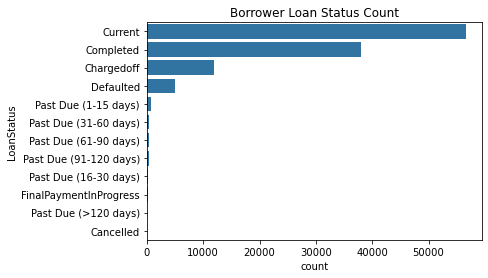

In [84]:
colors  = sb.color_palette()[0]
loan_ordered = loan_clean.LoanStatus.value_counts().index
sb.countplot(data = loan_clean, y = 'LoanStatus', color = colors, order = loan_ordered);
plt.title('Borrower Loan Status Count');

The bar chart provides further confirmation of the summary statistics. Borrowers do appear to be in good standing, the majority of them that is. Most are either current, have completed their payments, or had them charged off. Surprisingly though there are less borrowers that are past due, even combined for all time buckets, than there are defaults. My expectation was that there would be more past due accounts than defaults.

# Credit Grade

Credit grades are particularly important for lenders in determining a borrowers credit worthiness and how much credit should be extended to an individual. I want to see what the credit grade breakdown is like amongst prosper loan borrowers.

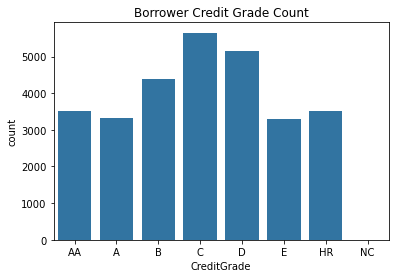

In [162]:
credit_ordered = loan_clean.CreditGrade.value_counts().index
sb.countplot(data = loan_clean, x = 'CreditGrade', color = colors);
plt.title('Borrower Credit Grade Count');

The majority of of borrowers whom have a credit grade already and have a prosper line of credit have sub-prime credit grades. Mostly of the C grade, then D, the third most frequent of grade B. The middle of pack are a mix of great and high risk credit ratings. The lower end of the distribution are again a mix of great and low-end credit ratings.

In relation with the bar chart for **LoanStatus** this paints a picture, thus far, that Prosper borrowers usually have sub-standard credit ratings but manage to be current on their loans or pay off their loans. In aggregate they are less likey to default on their loans and even less likely to behind.

# Borrower State

I want to see what the demographic breakdown is like based on where borrowers live as well. I'll plot a horizontal bar chart to make interpretation easier as there are many states that populate the chart.

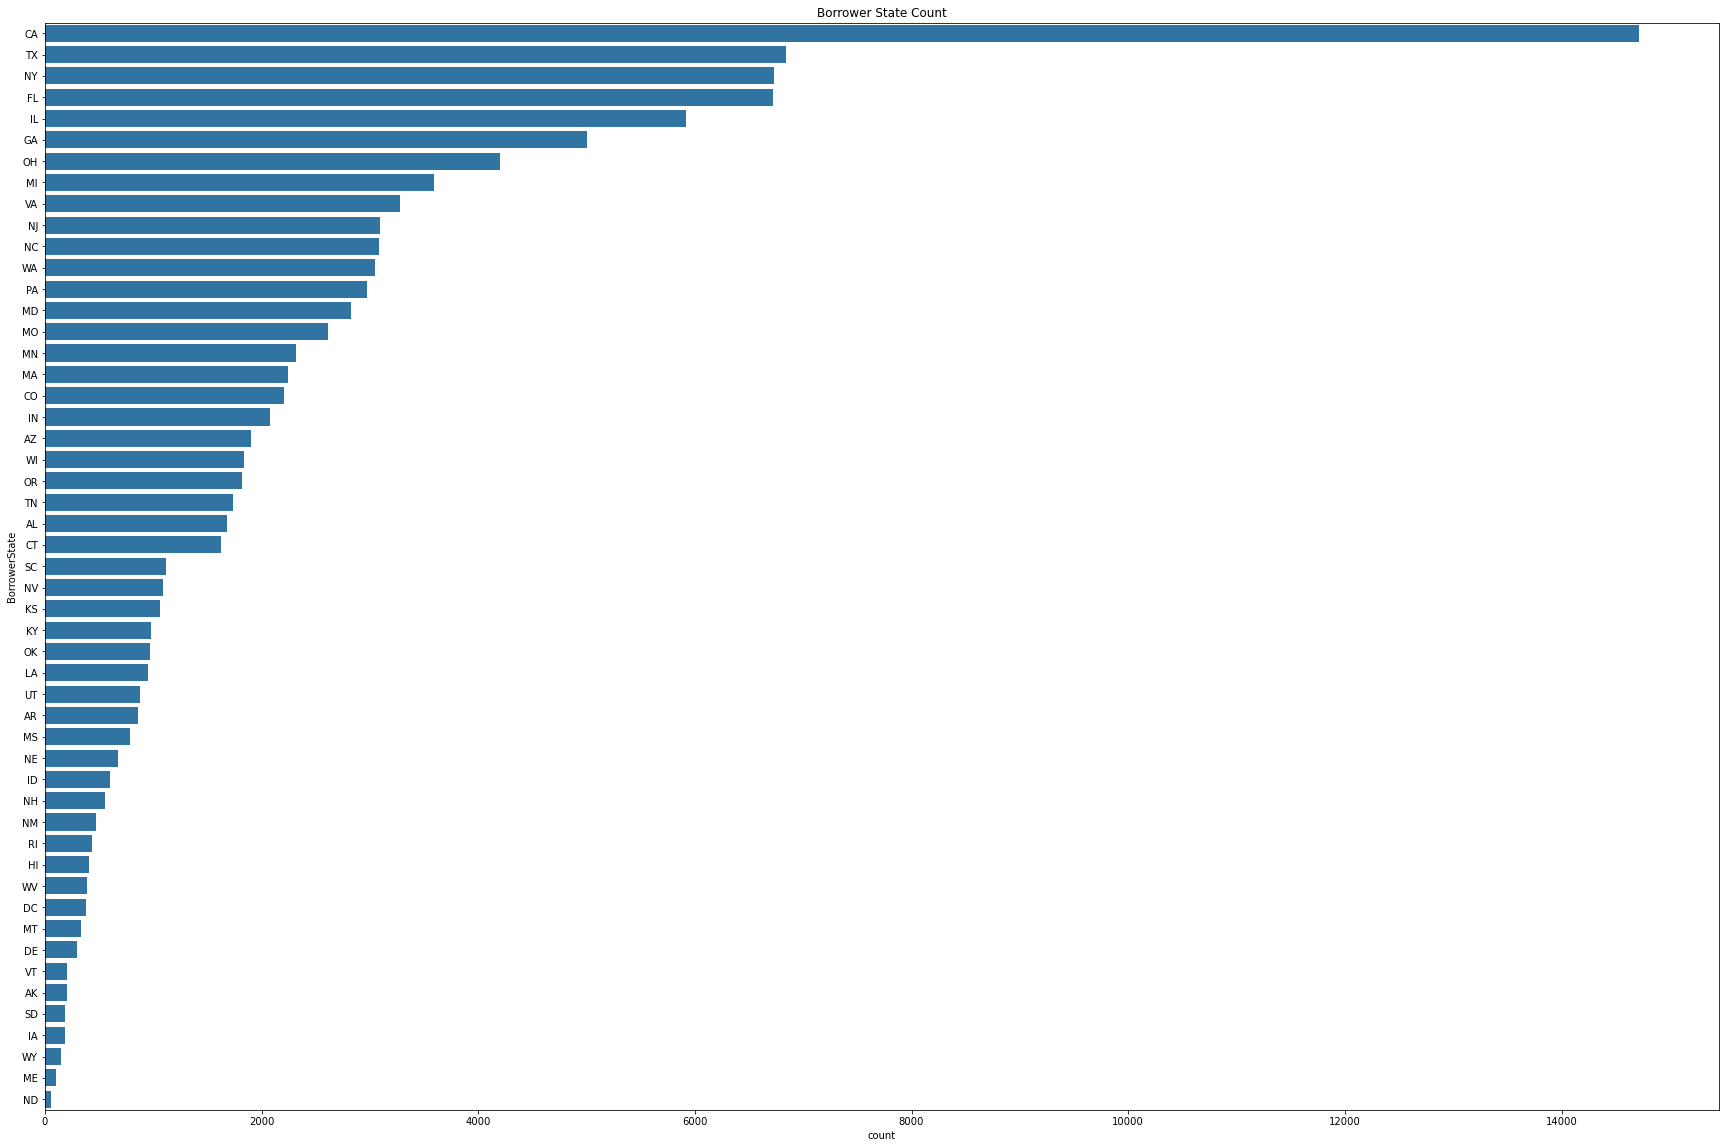

In [86]:
plt.figure(figsize = (30,20))
colors = sb.color_palette()[0]
states_ordered = loan_clean.BorrowerState.value_counts().index
sb.countplot(data = loan_clean, y = 'BorrowerState', color = colors, order = states_ordered);
plt.title('Borrower State Count');

The majority of borrowers reside in the states of California, Texas, New York, Florida, and Illinois, in that order. There isn't a concentration of borrowers from a specific region in the United States like say the pacific northwest, the north east, or mid-atlantic. They hail from all states situated all across the United States.

Some descriptive statistics are useful in understanding the pecentage breakdow by state of where borrowers reside.

In [87]:
#  The percentage breakdown of which states borrowers reside in
loan_clean.BorrowerState.value_counts(normalize = True) * 100

CA    13.573813
TX     6.310527
NY     6.206305
FL     6.198004
IL     5.461069
GA     4.618989
OH     3.870986
MI     3.313903
VA     3.023372
NJ     2.856431
NC     2.844441
WA     2.811238
PA     2.741141
MD     2.601870
MO     2.411872
MN     2.137942
MA     2.067846
CO     2.038332
IN     1.916585
AZ     1.753334
WI     1.698917
OR     1.675859
TN     1.602073
AL     1.548579
CT     1.500618
SC     1.034845
NV     1.005331
KS     0.979506
KY     0.906643
OK     0.895575
LA     0.879895
UT     0.808876
AR     0.788585
MS     0.725867
NE     0.621645
ID     0.552471
NH     0.508199
NM     0.435336
RI     0.401210
HI     0.377230
WV     0.360628
DC     0.352327
MT     0.304366
DE     0.276697
VT     0.190921
AK     0.184464
SD     0.174319
IA     0.171552
WY     0.138348
ME     0.093155
ND     0.047961
Name: BorrowerState, dtype: float64

# Employment Status

**EmploymentStatus** is a very important variable as creditors prefer for borrowers to show they have a source of income that borrowers can use to service their debt. Creditors view stable income a factor that lowers the risk of non-payment or defaulting on loans.

In [88]:
# The number of classifications of employment statuses
loan_clean.EmploymentStatus.nunique()

8

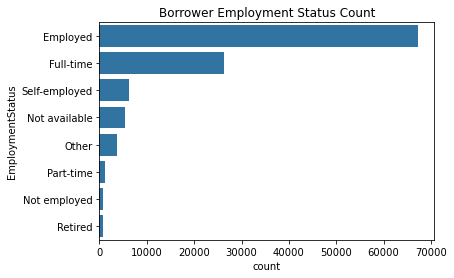

In [89]:
emp_order = loan_clean.EmploymentStatus.value_counts().index
sb.countplot(data = loan_clean, y = 'EmploymentStatus', color = colors, order = emp_order);
plt.title('Borrower Employment Status Count');

An overwhelming majority of borrower are classified as being employed, under full-time employment, or self-employent. A smaller subset are marked as not available, other, or part time. Not employed or retired round out the bottom two classifications.

Once again, descriptive statistics are useful in painting a more detailed, numeric breakdown of classifications.

In [90]:
loan_clean.EmploymentStatus.value_counts(normalize = True)

Employed         0.602801
Full-time        0.235983
Self-employed    0.054924
Not available    0.047877
Other            0.034079
Part-time        0.009742
Not employed     0.007477
Retired          0.007118
Name: EmploymentStatus, dtype: float64

**Thus far we can say that Prosper borrowers, usually, have less than great credit ratings, reside in a handful of states across the United States, and are typically employed overall.**

# Occupation

While employment is an important variable in determining credit worthiness the type of job a borrower isn't directly as important.

In [91]:
# Pulling the total amount of different classifications of job types
loan_clean.Occupation.nunique()

67

A horizontal bar chart will be best here since there is a large amount of unique job classifications.

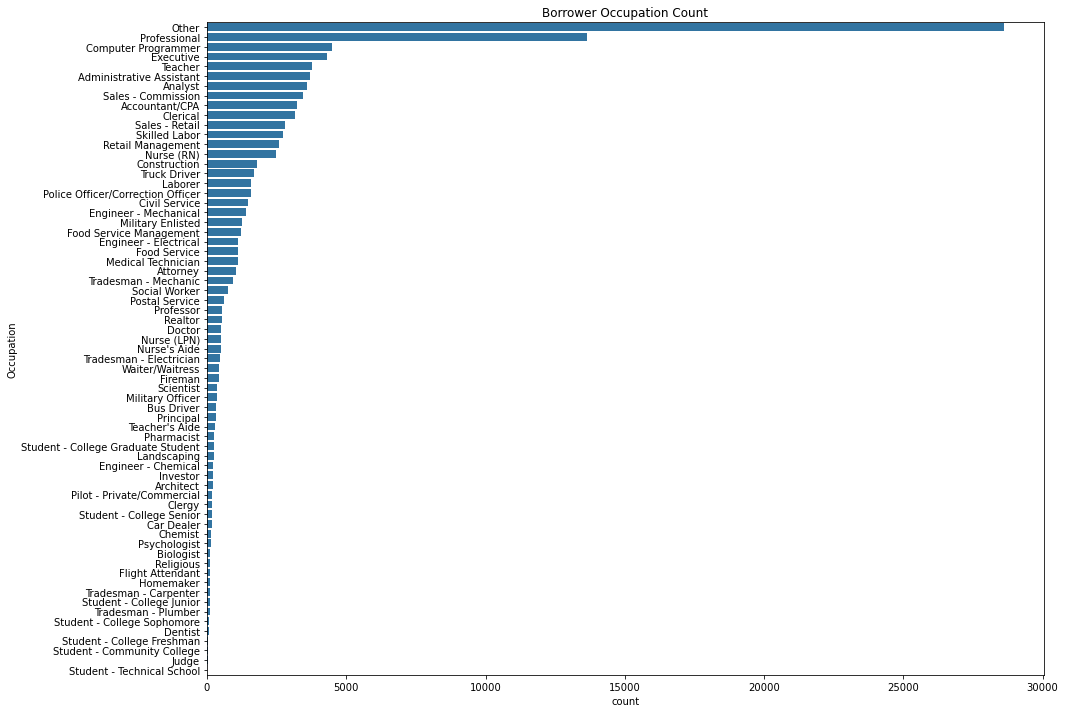

In [242]:
plt.figure(figsize = (15, 12))
job_order = loan_clean.Occupation.value_counts().index
sb.countplot(data = loan_clean, y = 'Occupation', color = colors, order = job_order);
plt.title('Borrower Occupation Count');

In [93]:
loan_clean.Occupation.value_counts(normalize = True)

Other                          0.259332
Professional                   0.123499
Computer Programmer            0.040580
Executive                      0.039067
Teacher                        0.034065
                                 ...   
Dentist                        0.000616
Student - College Freshman     0.000372
Student - Community College    0.000254
Judge                          0.000199
Student - Technical School     0.000145
Name: Occupation, Length: 67, dtype: float64

Out of all the classifications of jobs, 26% are classififed as other. Professional comes in at second and the two classifications together account for over 1/3 of all the jobs held by borrowers.

That concludes my initial assessment of the selected non-numerical variables. Now, I'll move on the to the numerical variables for further investigation.

## Numeric Variable Analysis

In [94]:
numeric_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerAPR', 'Term', 
                'OpenRevolvingAccounts','RevolvingCreditBalance', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 
                'TotalProsperLoans','BankcardUtilization', 'ProsperScore']

In [95]:
non_num_vars = ['Term', 'Occupation', 'EmploymentStatus', 'CreditGrade', 'BorrowerState']

# Loan Original Amount

Next up, the **LoanOriginalAmount**. This will be useful for understanding how much credit borrowers were typically approved for. This variable will also help me answer of my initial questions I have about loan payments.

# Question #1: What are the most common loan payment amounts?

In [96]:
loan_clean['LoanOriginalAmount'].mode(), loan_clean['LoanOriginalAmount'].describe()

(0    4000
 dtype: int64,
 count    113937.00000
 mean       8337.01385
 std        6245.80058
 min        1000.00000
 25%        4000.00000
 50%        6500.00000
 75%       12000.00000
 max       35000.00000
 Name: LoanOriginalAmount, dtype: float64)

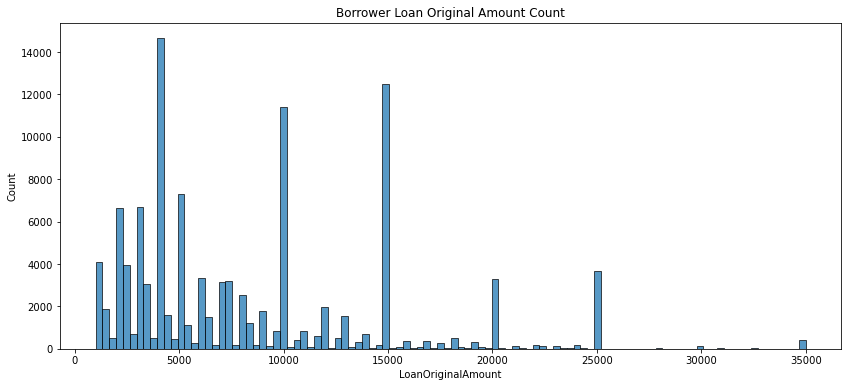

In [228]:
plt.figure(figsize = [14, 6])
sb.histplot(data = loan_clean, x = 'LoanOriginalAmount');
plt.title('Borrower Loan Original Amount Count');

In [98]:
loan_clean['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
7765         1
5652         1
9746         1
15889        1
12282        1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

# Answer: 
There is a quite a large range of loan credit borrowers were originally approved for, from as low as **\\$1,000** USD to as high as **\\$35,000 USD**. On average, **LoanOriginalAmounts** came in at \\$8,337 USD. The histogram depicts a wide range of original loan amounts, with a substantial right skewness accented with 8 very large peaks along the distribution. The most common original loan amount however, the mode, comes in at \\$4,000 USD.

# Monthly Loan Payment

Next up is is **MonthlyLoanPayment** which is important since it can be an indication of how much an individual has originally borrowed, is linked to their credit grade/credit report history, and a large monthly payment can be burdensome and influence how likely an individual is to become behind on their loan payments or even default on their loan entirely.

A histogram is appropriate for depicting the distrubition of values since the values for **MonthlyLoanPayment** are quantitative and continous.

In [99]:
# Pulling descriptive statistics to get an idea of the histogram might look
loan_clean.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

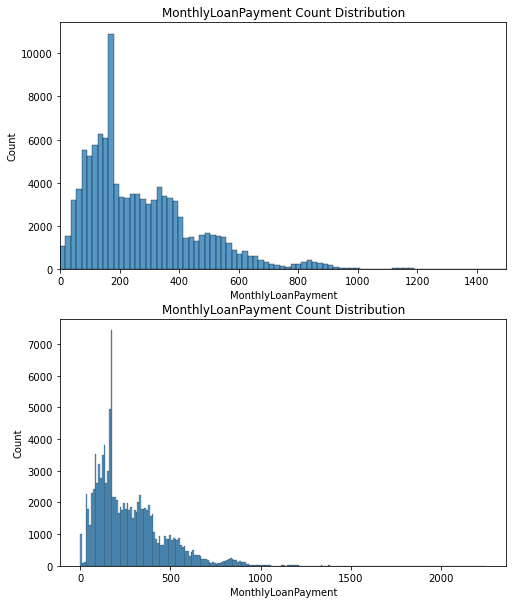

In [227]:
plt.figure(figsize = [8, 10])
bins = np.arange(0, loan_clean['MonthlyLoanPayment'].max() + 100, 100)

plt.subplot(2, 1, 1)
sb.histplot(data = loan_clean, x = 'MonthlyLoanPayment', bins = 125);
plt.xlim([0,1500]);
plt.title('MonthlyLoanPayment Count Distribution');


plt.subplot(2, 1, 2);
sb.histplot(data = loan_clean, x = 'MonthlyLoanPayment');
plt.title('MonthlyLoanPayment Count Distribution');

In [101]:
# Seeing how the single substantial peak aligns with the descriptive statistics for the variable along with its mode
loan_clean.MonthlyLoanPayment.mode(), loan_clean.MonthlyLoanPayment.value_counts()

(0    173.71
 dtype: float64,
 173.71    2423
 0.00       935
 172.76     536
 86.85      472
 174.20     460
           ... 
 35.80        1
 97.58        1
 427.51       1
 81.08        1
 190.40       1
 Name: MonthlyLoanPayment, Length: 23567, dtype: int64)

The distribution of values for **MonthlyLoanPayment** is very much right skewed and unimodial with a single substantial peak at it's mode, the most common monthly loan payment amount of \\$173.71 USD and an observed average monthly loan payment of \\$272.45 USD.

# Borrower APR

**BorrowerAPR** is the borrower's Annual Percentage Rate (APR) for the loan.

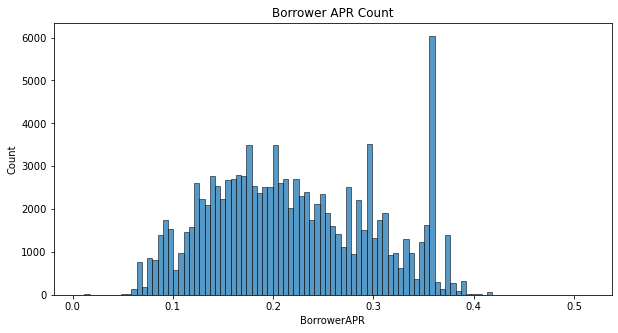

In [102]:
plt.figure(figsize = [10, 5])
sb.histplot(data = loan_clean, x = 'BorrowerAPR');
plt.title('Borrower APR Count');

The distribution for **BorrowerAPR** is unimodial and displays right skewness while featuring several spikes ranging from the left to the right end of the distribution. There are also two prominent spikes around the center of the distribution and two more the right. The peak furtherest right is the most prominent and is also the mode **BorrowerAPR** of .35 or 35%, a siginificantly high APR.

In [103]:
loan_clean.BorrowerAPR.value_counts(), loan_clean.BorrowerAPR.describe()

(0.35797    3672
 0.35643    1644
 0.37453    1260
 0.30532     902
 0.29510     747
            ... 
 0.22745       1
 0.30208       1
 0.28470       1
 0.13572       1
 0.08855       1
 Name: BorrowerAPR, Length: 6677, dtype: int64,
 count    113912.000000
 mean          0.218828
 std           0.080364
 min           0.006530
 25%           0.156290
 50%           0.209760
 75%           0.283810
 max           0.512290
 Name: BorrowerAPR, dtype: float64)

The value counts and descriptive statistics for **BorrowerAPR** serve as further confirmation.

# Term

Next up is **Term**, the overall length of time borrowers were given to fully payoff their loans.

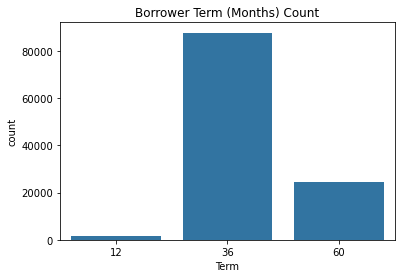

In [142]:
sb.countplot(data = loan_clean, x = 'Term', color = colors);
plt.title('Borrower Term (Months) Count');

In [105]:
# Pull the percentages of borrowers for term times
loan_clean.Term.value_counts(normalize = True)

36    0.770408
60    0.215426
12    0.014166
Name: Term, dtype: float64

There were 3 term lengths that borrowers could be under, 12 months, 36 months, or 60 months and the vast majority, 77% of borrowers, had loans for 36 months.

# Open Revolving Accounts

**OpenRevolvingAccounts** is the number of open revolving accounts at the time the credit profile was pulled each borrower. It is an important variable as it gives lenders insight into the credit history of borrowers and allows them to gauge the risk of extending a line of credit. A large amount of open accounts can be a red flag for lenders especially if those accounts aren't in good standing.

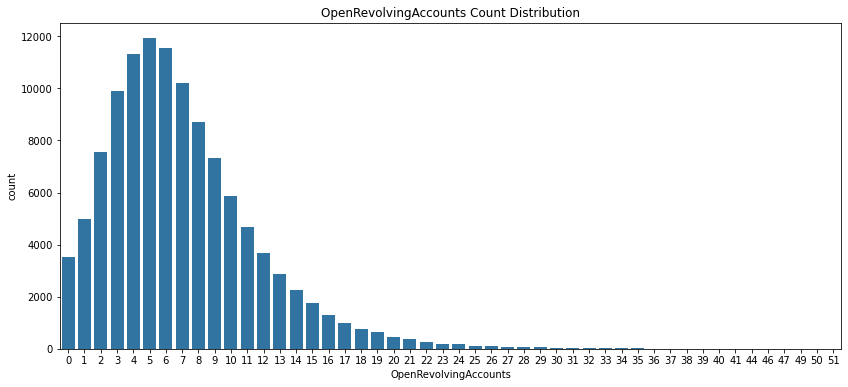

In [225]:
plt.figure(figsize = [14,6])
sb.countplot(data = loan_clean, x = 'OpenRevolvingAccounts', color = colors);
plt.title('OpenRevolvingAccounts Count Distribution');

The bar plot distribution for **OpenRevolvingAccounts** is very much skewed to the right with visible values for open revoling accounts as far out/as high as the low thirties. The distribution indicates that the majority of borrowers had open revolving accounts ranging from 0-10 however. Some borrowers had open accounts totaling as high as 51!

In [107]:
loan_clean.OpenRevolvingAccounts.describe()

count    113937.00000
mean          6.96979
std           4.63097
min           0.00000
25%           4.00000
50%           6.00000
75%           9.00000
max          51.00000
Name: OpenRevolvingAccounts, dtype: float64

In [108]:
loan_clean.OpenRevolvingAccounts.value_counts()

5     11928
6     11545
4     11315
7     10220
3      9901
8      8705
2      7557
9      7317
10     5875
1      4989
11     4696
12     3678
0      3506
13     2875
14     2277
15     1775
16     1297
17     1000
18      760
19      630
20      470
21      360
22      278
23      196
24      185
25      126
26      103
27       80
29       58
28       57
30       42
31       29
32       26
34       14
33       12
35       12
36       10
38        6
37        5
39        5
41        5
40        4
46        2
47        2
44        1
49        1
50        1
51        1
Name: OpenRevolvingAccounts, dtype: int64

On average borrowers had 7 open revolving credit accounts. A slight bit more than the median value of 6 open accounts.

# Revolving Credit Balance

(0.0, 300000.0)

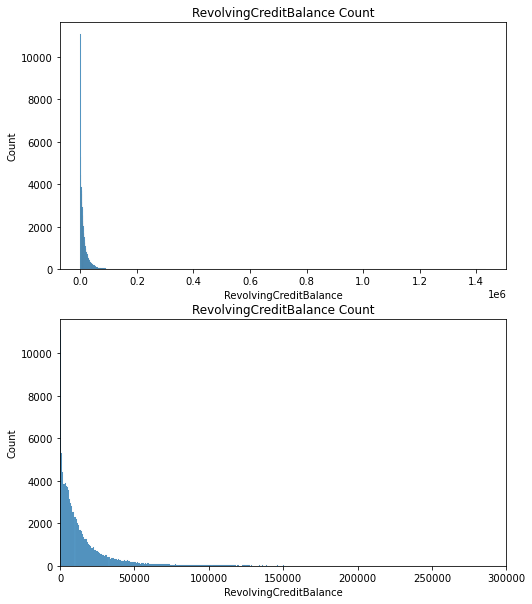

In [229]:
plt.figure(figsize = [8, 10])
plt.subplot(2, 1, 1)
sb.histplot(data = loan_clean, x = 'RevolvingCreditBalance');
plt.title('RevolvingCreditBalance Count');
#plt.xscale('log');
#plt.yscale('log');
#plt.xlim([0, 300000])

plt.subplot(2, 1, 2)
sb.histplot(data = loan_clean, x = 'RevolvingCreditBalance');
plt.title('RevolvingCreditBalance Count');
#plt.xscale('log');
#plt.yscale('log');
plt.xlim([0, 300000])

**RevolvingCreditBalance** has a large range of value  which makes properly representing the distribution of values slightly tricker. Log scaling the axes and bins will help resolve this issue though.

In [110]:
# Suppress the notation to get a clearer idea of the numeric breakdown & retrieve value counts
loan_clean.RevolvingCreditBalance.describe().apply(lambda x: format(x, 'f')), loan_clean.RevolvingCreditBalance.value_counts()

(count     106333.000000
 mean       17598.706751
 std        32936.401788
 min            0.000000
 25%         3121.000000
 50%         8549.000000
 75%        19521.000000
 max      1435667.000000
 Name: RevolvingCreditBalance, dtype: object,
 0.0        4059
 59.0         36
 39.0         32
 75.0         27
 3.0          26
            ... 
 24765.0       1
 23901.0       1
 27088.0       1
 19897.0       1
 88089.0       1
 Name: RevolvingCreditBalance, Length: 38555, dtype: int64)

In [111]:
# Getting the log of the descriptive statistics to help set better x-axis bins
np.log10(loan_clean.RevolvingCreditBalance.describe())

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.026668
mean     4.245481
std      4.517676
min          -inf
25%      3.494294
50%      3.931915
75%      4.290502
max      6.157054
Name: RevolvingCreditBalance, dtype: float64

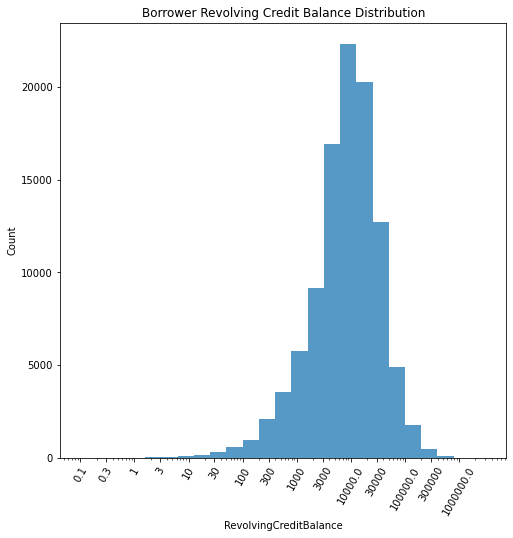

In [112]:
# Plotting w/ log scaling and log bins
plt.figure(figsize = [8, 8])
bins = 10 ** np.arange(-1, 6.3 + .3, .3)
ticks = [.1, .3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10e3, 30000, 10e4, 300000, 10e5]
labels = ['{}'.format(v) for v in ticks]
sb.histplot(data = loan_clean, x = 'RevolvingCreditBalance', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels, rotation = 60);
plt.title('Borrower Revolving Credit Balance Distribution');

Out of all the variables so far **RevolvingCreditBalance** stands out the most due to its vast range of values. The descriptive statistics indicate a minimum of zero, a mean of \\$17,598 USD, a modeof \\$0 USD, and a maximum of \\$1,435,667 USD.

This shows that while most borrowers had zero credit at the time their credit reports were pulled other applicants on average had just over \\$17,598 USD. Up to 75% of borrowers had revolving credit balances of \\$19,521 USD, not far off from the average. Some borrowers, a siginificantly smaller population, further out in the right side of the distribution had balances vastly larger, as high as seven figures.



In [113]:
# Descriptive statistics and suppressing notation values
loan_clean['StatedMonthlyIncome'].describe().apply(lambda x: format(x, 'f'))

count     113937.000000
mean        5608.025568
std         7478.497275
min            0.000000
25%         3200.333333
50%         4666.666667
75%         6825.000000
max      1750002.916667
Name: StatedMonthlyIncome, dtype: object

# Stated Monthly Income

**StatedMonthlyIncome** has a wide range of values as well and its distribution benefits from log scaling when plotting. It has a range of values from \\$0 to \\$1,750,002 for monthly income.

In [114]:
np.log10(loan_clean.StatedMonthlyIncome.describe())

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

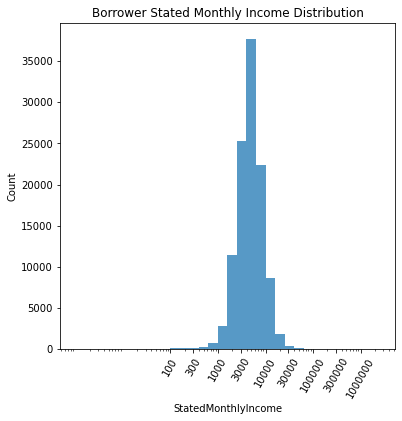

In [115]:
plt.figure(figsize = [6, 6])
bins = 10 ** np.arange(0, 6.24 + .2, .2)
ticks = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
labels = ['{}'.format(v) for v in ticks]
sb.histplot(data = loan_clean, x = 'StatedMonthlyIncome', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels, rotation = 60);
plt.title('Borrower Stated Monthly Income Distribution');

# Debt-To-Income Ratio

**DebtToIncomeRatio** is important for lenders because potential borrowers who already heavily burdened with debt are potentially more liable to fall behind on thier payments or default if they can no longer service their debt(s).

As part of my analysis it's important as it is a factor taken into consideration during credit pulls when lenders are trying to establish what **BorrowerAPR** to set.

In [116]:
# Descriptive statistics and top 5 most common debt-to-income ratios
loan_clean['DebtToIncomeRatio'].describe(), loan_clean.DebtToIncomeRatio.value_counts()[:4]

(count    105383.000000
 mean          0.275947
 std           0.551759
 min           0.000000
 25%           0.140000
 50%           0.220000
 75%           0.320000
 max          10.010000
 Name: DebtToIncomeRatio, dtype: float64,
 0.18000    4132
 0.22000    3687
 0.17000    3616
 0.14000    3553
 0.20000    3481
            ... 
 0.14586       1
 0.11482       1
 0.08154       1
 0.40475       1
 4.00000       1
 Name: DebtToIncomeRatio, Length: 832, dtype: int64)

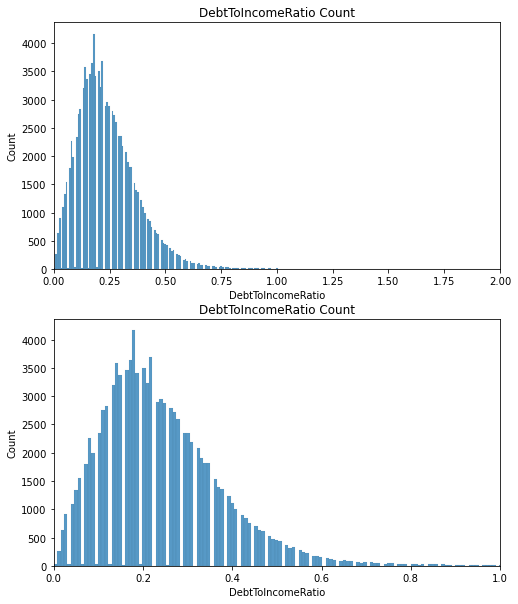

In [217]:
plt.figure(figsize = [8, 10]);
plt.subplot(2, 1, 1)
sb.histplot(data = loan_clean, x = 'DebtToIncomeRatio');
plt.title('DebtToIncomeRatio Count');
plt.xlim([0,2]);

plt.subplot(2, 1, 2)
sb.histplot(data = loan_clean, x = 'DebtToIncomeRatio');
plt.title('DebtToIncomeRatio Count');
plt.xlim([0,1]);

On average, borrowers had a **DebtToIncomeRatio** of .2759 or 27.6%. The mean and the median are fairly close, .2759 and .2200 (22\%), respectively. The distribution is unimodal and exhibists right skewness with values all the way out to a maximum value of 10.01 along the right tail.

# Total Prosper Loans

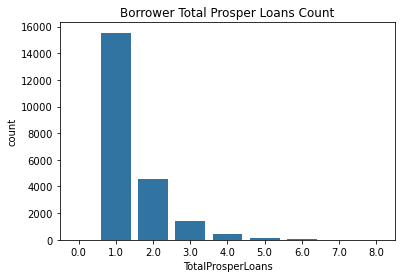

In [118]:
sb.countplot(data = loan_clean, x = 'TotalProsperLoans', color = colors);
plt.title('Borrower Total Prosper Loans Count');

In [119]:
# Pulling the percentages for total prosper loans
loan_clean.TotalProsperLoans.value_counts(normalize = True) * 100

1.0    70.355445
2.0    20.556939
3.0     6.551958
4.0     1.888159
5.0     0.470908
6.0     0.131311
7.0     0.036224
0.0     0.004528
8.0     0.004528
Name: TotalProsperLoans, dtype: float64

The vast majority of borrowers, up to 90%, had either 1 or 2 prosper loans beforehand.

# Bank Card Utilization

In [120]:
loan_clean.BankcardUtilization.describe()

count    106333.000000
mean          0.561309
std           0.317918
min           0.000000
25%           0.310000
50%           0.600000
75%           0.840000
max           5.950000
Name: BankcardUtilization, dtype: float64

In [121]:
loan_clean.BankcardUtilization.value_counts()

0.00    6782
0.98    2171
0.97    2053
0.96    1798
0.95    1791
        ... 
1.90       1
1.84       1
1.97       1
1.63       1
1.69       1
Name: BankcardUtilization, Length: 201, dtype: int64

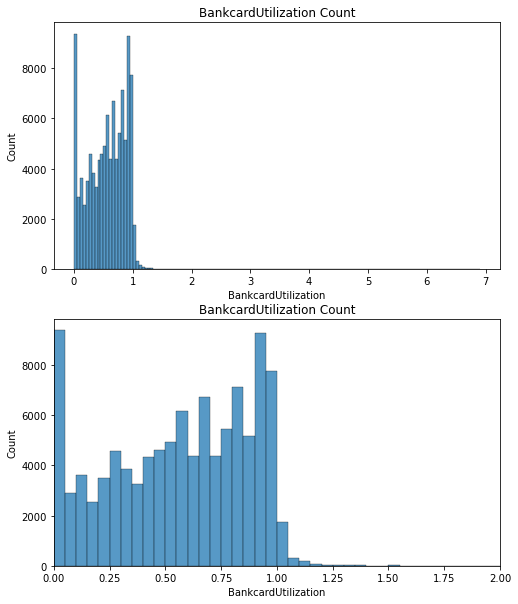

In [214]:
plt.figure(figsize = [8, 10])
bins = np.arange(0, loan_clean['BankcardUtilization'].max()+1, .05)
plt.subplot(2, 1, 1)
sb.histplot(data = loan_clean, x = 'BankcardUtilization', bins = bins);
plt.title('BankcardUtilization Count');

plt.subplot(2, 1, 2)
sb.histplot(data = loan_clean, x = 'BankcardUtilization', bins = bins);
plt.title('BankcardUtilization Count');
plt.xlim([0,2]);

In [123]:
np.log10(loan_clean.BankcardUtilization.describe())

/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.026668
mean    -0.250798
std     -0.497685
min          -inf
25%     -0.508638
50%     -0.221849
75%     -0.075721
max      0.774517
Name: BankcardUtilization, dtype: float64

The descriptive statistics show that the highest level of bank card utilization is siginificantly higher than the average of 0.56, at a value of 5.95. The overwhelming majority of bank card utilizations are less then even 1. The most common bank card utilization value amongst borrowers though was 0, indicating that most borrowers didn't have any credit before or that at the time of the credit report pulls most borrowers had no current balances on their bank cards.

The histogram distribution **BankcardUtilization** exhibits left skewness with a mean lesser than the median.

# Prosper Score

**ProsperScore** is important as it is similar to **CreditGrade** but is Prosper's custom built historical rating system they use to guage the creditworthiness of and risk of borrowers and whether granting a loan is within the bounds of their requirements.

In [124]:
# Pulling the descriptive statistics for ProsperScore
loan_clean.ProsperScore.describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

**ProsperScore** is a rating scale with values from 1-10. Therefore values that fall outside of this range are erroneous and can be filtered

In [125]:
# Previewing what the unique values are ProsperScore
loan_clean.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [126]:
# Create a filtered dataframe leaving out prosper scores != to 11
adjusted_prosper_score = loan_clean.query("ProsperScore != 11")

Since the variables for **ProsperScore** are quantitatively discrete a bar graph for each rating is the most appropriate chart for its distribution of values

In [127]:
# The list of the most common prosper scores by percentage
loan_clean.ProsperScore.value_counts(normalize = True)

4.0     0.148433
6.0     0.144697
8.0     0.142046
7.0     0.124887
5.0     0.115647
3.0     0.090062
9.0     0.081447
2.0     0.067953
10.0    0.055979
11.0    0.017159
1.0     0.011691
Name: ProsperScore, dtype: float64

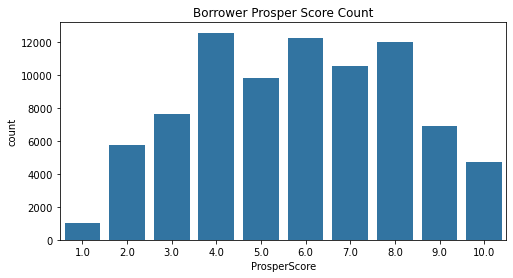

In [128]:
# Plotting the distribution of values
plt.figure(figsize = [8,4])
sb.countplot(data = adjusted_prosper_score, x = 'ProsperScore', color = colors);
plt.title('Borrower Prosper Score Count');

The bar graph distribution depicts a concentration of values amongst borrowers for scores between 4-8 with a lower frequency on both ends the rating scale. Somewhat surprisingly there are more borrowers with a perfect **ProsperScore** score of 10 than there are borrowers with a **ProsperScore** of 1. 1 is the lowest possible score as well as the lowest rating count by frequency amongst all scores. This would possibly indicate that prosper loans are least likely to be granted to borrowers deemed more liable because of their low prosper rating score.

## Univariate Key Takeaways

In summary, we can say that Prosper borrowers, usually, have less than great credit ratings, reside in a handful of states across the United States, and are typically employed overall. The two most frequent areas of work borrowers work in are occupations categorized as other or professional.

Although the range of original loan amounts varied from \\$1,000 USD to \\$35,000 USD on average borrowers had original loan amounts of \\$8,337 USD and the most frequent original loan amount was \\$4,000 USD.

The most common monthly loan payment amount is \\$173.71 USD and the average amounts to \\$272.45 USD.

In the case of borrower APR the most common APR was 35% while the average and median APRs amounted to 21%.

As for the amount of time that prosper loans had attached for maturity there were three timeframes: 12, 36, and 60 months. 77% of borrowers had loan term timeframes of 36 months.

The average amount of open revolving credit accounts borrowers had at the time of their credit report being pulled for a propser loan was 7, the median was 6, and the mode was 5.

The average revolving credit balance was \\$17,598 USD while the most common value was \\$0.

On average, the stated monthly income of all borrowers was \\$5,608 and the median amounted to \\$4,666. Interestingly enough, the range was quite large, with some borrowers reporting no monthly income and others as high \\$1.75 million.

Debt-to-income ratios across all borrowers on average amounted to 27.6\% and a median value of 22%. The high levels of debt by some borrowers, as high as 10 times their income pulls the average up. However, the most frequent debt-to-income ratio amounted to .18 or 18%.

In the case of the total prosper loans that borrowers had just over 90% of borrowers either 1 or 2 loans. 70% had 1 loan while 20% had 2.

Bank card utilization peaked at a maximum of 5.95 while averaging .56 across all borrowers. The most common value however was 0, indicating borrowers either had no current utilization or no credit.

And in the case of prosper scores, scores ranging from 4 to 8 comprised over 67\% of all prosper scores across all borrowers within a range of 1-10. A small subset of borrowers were improperly marked with a value greater than prosper score rating system allows for.

# Univariate Exploration Conclusion

That concludes my univate exploration of my selected variables. The analysis from each variable helps form an general understanding of the dataset and what the data is telling me. More importantly though is how each variable relates to one another, aiding in providing even deeper understanding of the variables and the questions I have.

# Bivariate Exploration

## Question #2: What factors affect a loan’s outcome status?

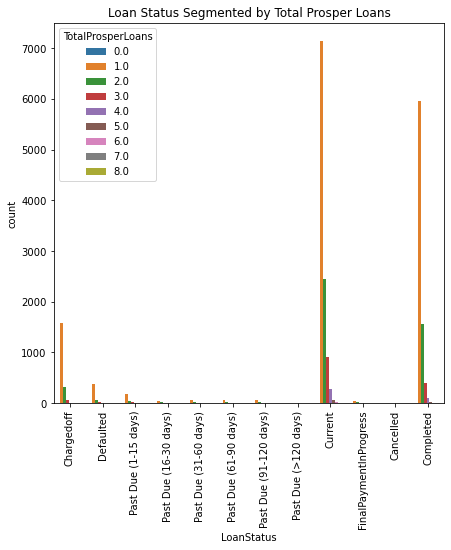

In [144]:
plt.figure(figsize = [7,7])
sb.countplot(data = loan_clean, x = 'LoanStatus', hue = 'TotalProsperLoans');
plt.xticks(rotation =90);
plt.title('Loan Status Segmented by Total Prosper Loans');

I want to see what the distribution of values for LoanStatus looks like across different numeric variables to see if any clear patterns or relationships stand out.

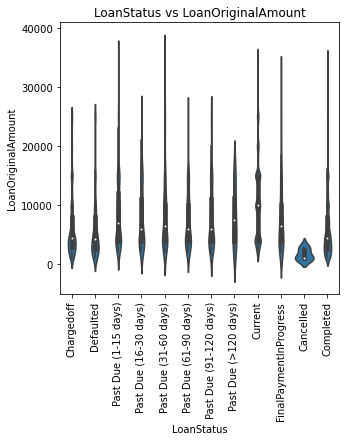

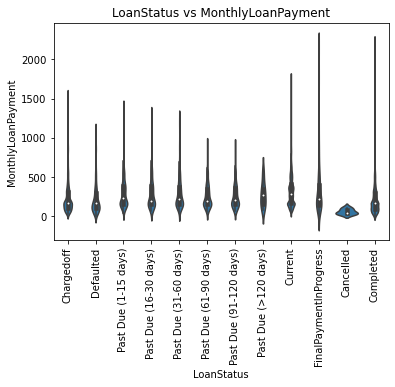

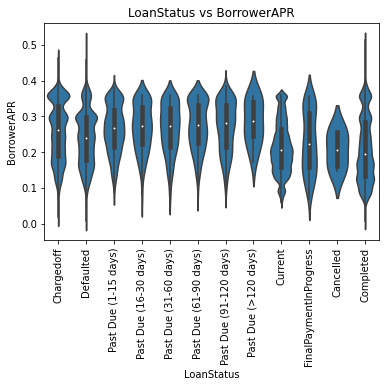

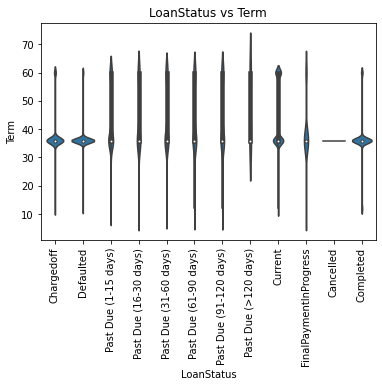

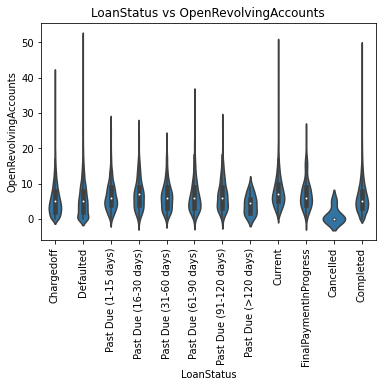

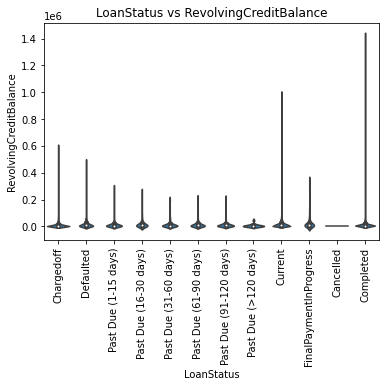

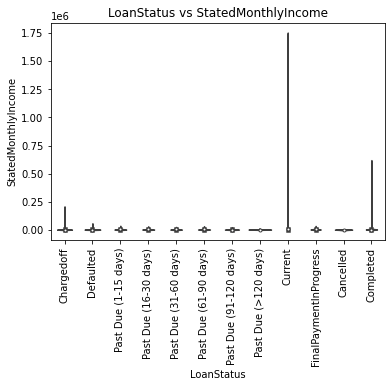

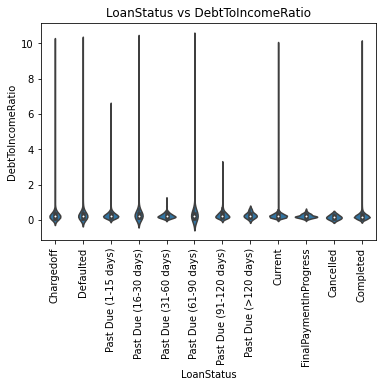

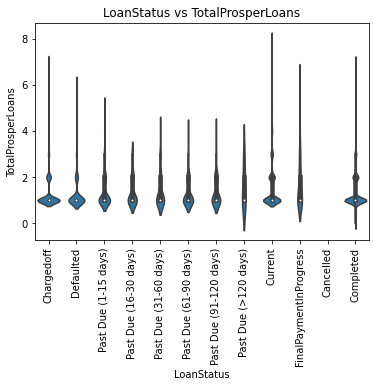

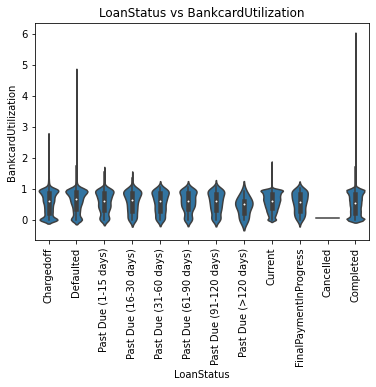

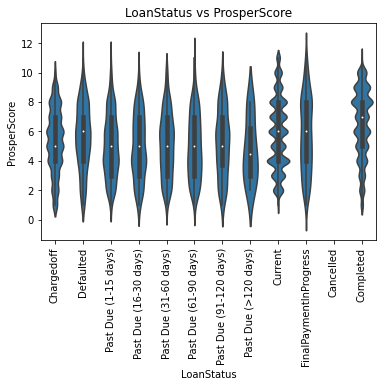

In [204]:
plt.figure(figsize = [5,5])
for i in numeric_vars:
    sb.violinplot(data = loan_clean, x = 'LoanStatus', y = i, color = colors);
    plt.xticks(rotation = 90)
    plt.title('LoanStatus vs {}'.format(i))
    plt.show()

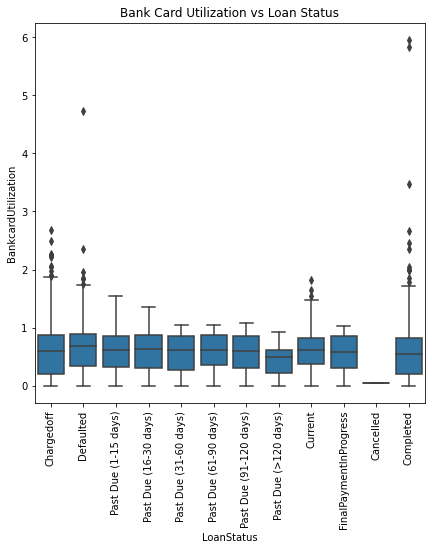

In [131]:
# A closer look at the disitribution of values between loan status and bank card utilization
plt.figure(figsize = [7,7])
sb.boxplot(data = loan_clean, x = 'LoanStatus', y = 'BankcardUtilization', color = colors);
plt.xticks(rotation = 90);
plt.title('Bank Card Utilization vs Loan Status');

### Observation

There aren't any clear patterns or relationships between loan status and any of the numeric variables from my filtered dataset. The distribution of values in each of the violin plots, in each variable association, are very similar. 

The only association with loan status that stood out amongst the rest is bank card utilization. The distribution for loans that resulted in default is quite similar to the rest in the plot. However, loans that resulted in default saw bank card utilizations as high as almost 5 for some borrowers. Surprisingly, the same is true of loans that resulted in completion, with an upper limit for bank card utilization that was as high as 6.

However, the box plots for this relationship depict that outliers are the cause for this. The box plots also show that the the quartiles for each of the loan status categories are very much around the same levels.

There may be patterns between loan status and the non-numeric/categorical variables. 

I'll go ahead and explore those as well.

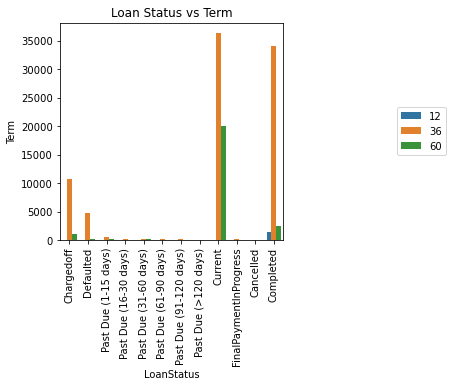

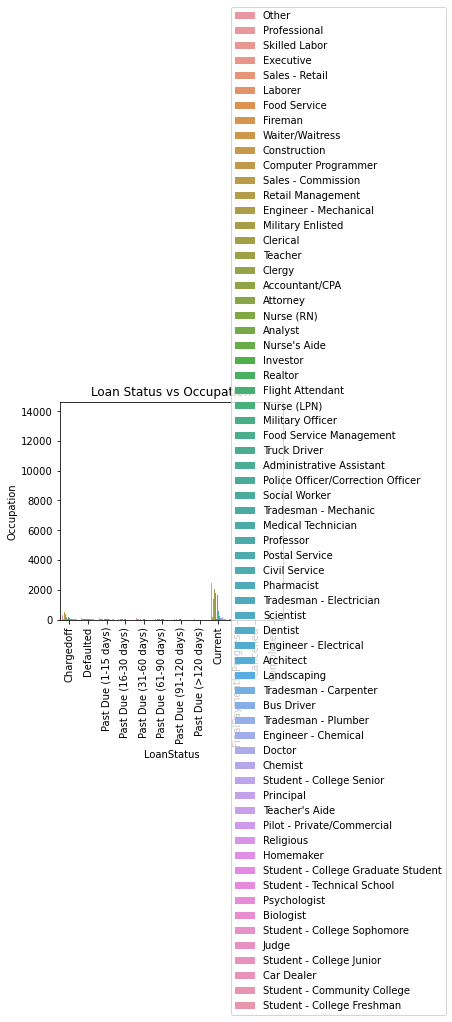

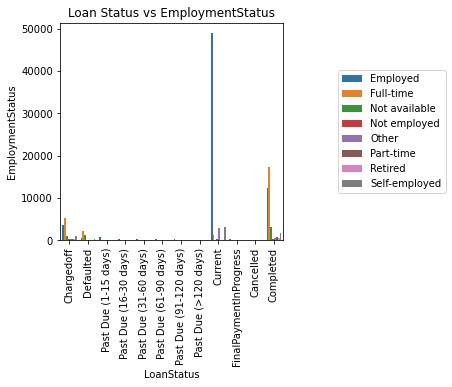

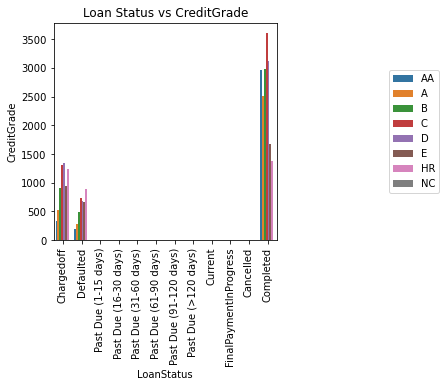

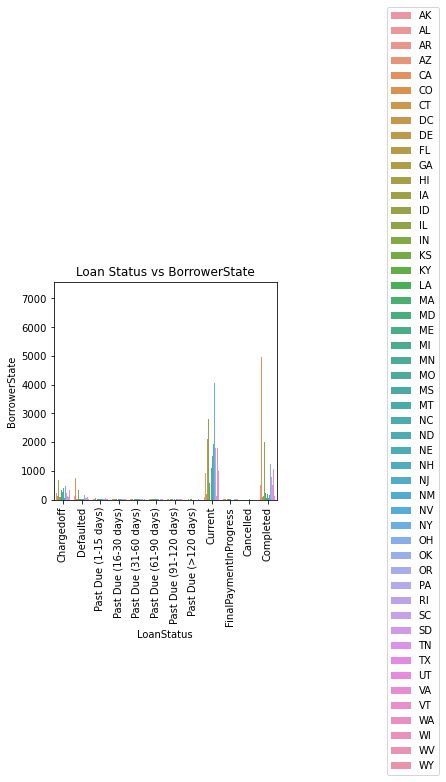

In [202]:
for i in non_num_vars:
    plt.figure(figsize = [4,4]);
    g = sb.countplot(data = loan_clean, x = 'LoanStatus', hue = i);
    plt.xticks(rotation = 90);
    plt.ylabel(i);
    g.legend(loc='right', bbox_to_anchor=(1.75, 0.5), ncol=1);
    plt.title('Loan Status vs {}'.format(i))
    plt.show(g);

### Observation
Nothing from the categorical variable standout in suggesting that a particular factor is associated with determing loan status or that a clear, distinct pattern or relationship exists between the two.

## Question #3: What factors most affect a borrower’s APR or interest rate?

Correlation are often a great tool in seeing what relationships are like for quantitative variables.

<AxesSubplot:>

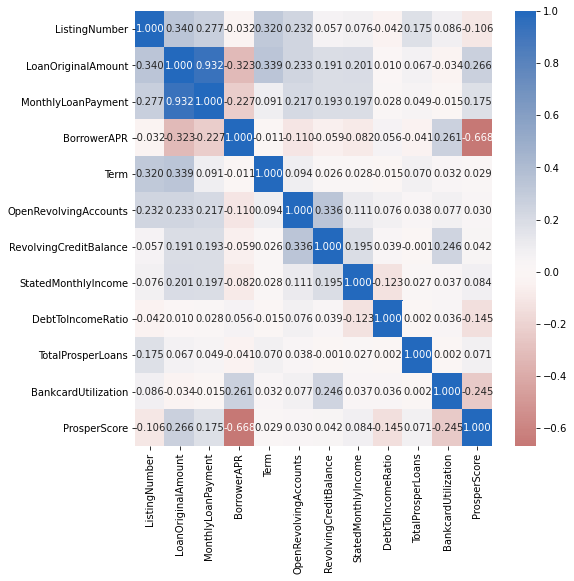

In [133]:
plt.figure(figsize = (8,8));
sb.heatmap(loan_clean.corr(), cmap = 'vlag_r', fmt = '.3f', center = 0, annot = True);

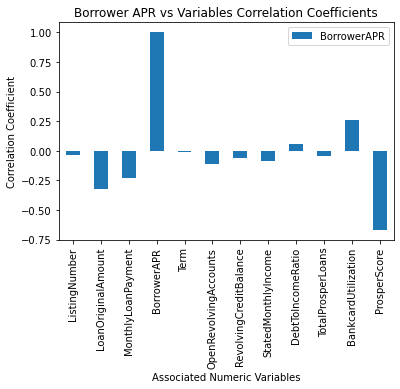

In [134]:
# Bar graph correlations for borrower APR
loan_clean.corr()[['BorrowerAPR']].plot(kind = 'bar');
plt.xticks(rotation = 90);
plt.ylabel('Correlation Coefficient');
plt.xlabel('Associated Numeric Variables');
plt.title('Borrower APR vs Variables Correlation Coefficients');

Four variables stand out here: **LoanOriginalAmount**, **MonthlyLoanPayment**, **BankcardUtilizaton**, and **ProsperScore**. Scatter plot will be very helpful in depicting the relationships for each of these.

In [135]:
# BorrowerAPR descriptive statistics
loan_clean.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

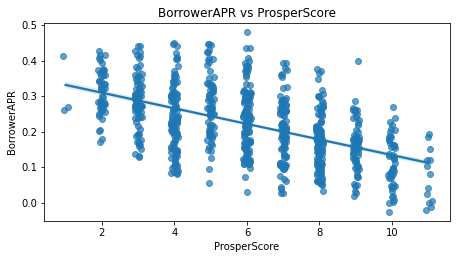

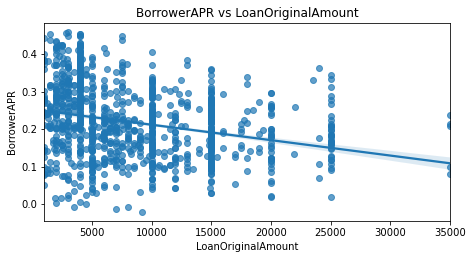

In [200]:
# List of the top four correlations. Loop through the list to plot visuals
top_four = ['ProsperScore', 'LoanOriginalAmount', 'BankcardUtilization', 'MonthlyLoanPayment']
count = 1
for var in top_four[:2]:
    plt.figure(figsize = [16,8])
    plt.subplot(2, 2, count)
    sb.regplot(data = loan_clean.sample(1000), x = var , y = 'BorrowerAPR', x_jitter = 1/10, y_jitter = 1/10, 
               scatter_kws = {'alpha': .7});
    plt.ylabel('BorrowerAPR');
    plt.xlabel(var);
    plt.title('BorrowerAPR vs {}'.format(var));
    count += 1
    plt.show();

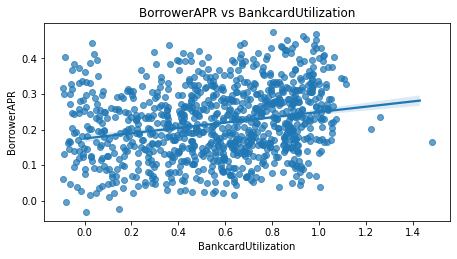

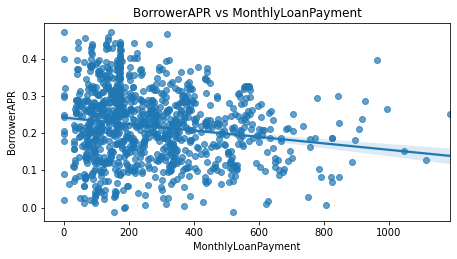

In [201]:
top_four = ['ProsperScore', 'LoanOriginalAmount', 'BankcardUtilization', 'MonthlyLoanPayment']
count = 1
for var in top_four[2:]:
    plt.figure(figsize = [16,8])
    plt.subplot(2, 2, count)
    sb.regplot(data = loan_clean.sample(1000), x = var , y = 'BorrowerAPR', x_jitter = 1/10, y_jitter = 1/10, 
               scatter_kws = {'alpha': .7});
    plt.ylabel('BorrowerAPR');
    plt.xlabel(var);
    plt.title('BorrowerAPR vs {}'.format(var));
    count += 1
    plt.show();

### Observation

Out of all the variables I've selected, ProsperScore, LoanOriginalAmount, BankcardUtilization, and MonthlyLoanPayment have the most impact on BorrowerAPR, in that order respectively. 

ProsperScore has a strong negative correlation with BorrowerAPR. The higher a borrowers prosper score the lower their loan APR would be.

LoanOriginalAmount has a relatively weaker negative correlation with BorrowerAPR than ProsperScore, with a pearson correlation value that's almost half the amount of ProsperScore. The higher the original loan amount was the lower the APR tends to be.

BankcardUtilization has a moderate positive correlation with BorrowerAPR. Borrowers that had greater bank card utilization saw higher APRs in general.

MonthlyLoanPayment, much like LoanOriginalAmount, is negatively correlated with BorrowerAPR; borrowers with higher monthly loan payments generally had lower APRs on their loans.

## Question #4: What do loan outcomes look like based on employment status?

I want to see if any patterns or relationships exist between LoanStatus and EmploymentStatus. A clustered bar chart is a great option for visualizing the two qualitative variables.

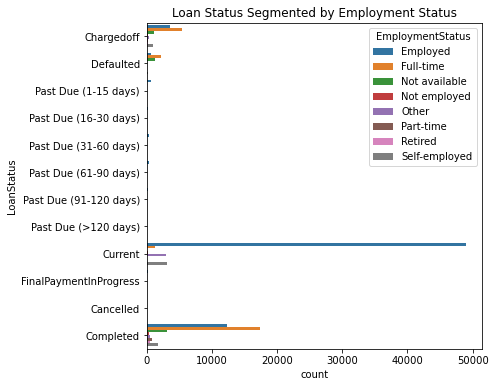

In [137]:
plt.figure(figsize = [6,6]);
sb.countplot(data = loan_clean, y = 'LoanStatus', hue = 'EmploymentStatus');
plt.title('Loan Status Segmented by Employment Status');

### Observation

Based on the clustered bar chart there doesn't appear to be any noticeable pattern or trend. The relationship between LoanStatus and EmploymentStatus is that the vast majority of borrowers are either current on their loans or have completed paying them off. And within these two sub-statuses borrowers are largely employed in some capacity or working full-time. 

# Question #5: Do less favorable employment statuses go for longer term loans?

My reasoning for asking this question is that I'd expect that borrowers who are partially employed or aren't employed would opt for longer terms so they aren't burdended by having to pay off their loans on a shorter timeframe. EmploymentStatus and Term are both qualitative variables so a clustered bar chart will be effective in visualizing any trend or patterns.

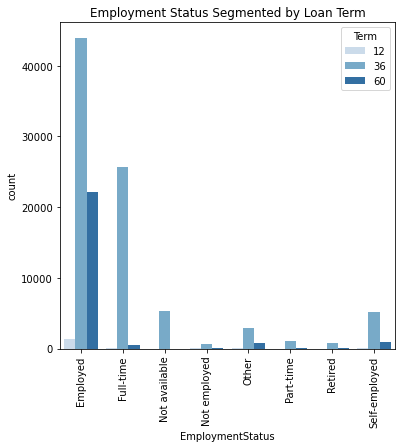

In [138]:
plt.figure(figsize = [6,6]);
sb.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.xticks(rotation = 90);
plt.title('Employment Status Segmented by Loan Term');

### Observation

To my surprise the the longest terms for a loan, 60 months, were taken up by borrowers who were employed overall, or classified as employed full-time, other or self employed, in that order of frequency. Borrowers who were classified as not employed or not available largely took on loan terms of 36 months. Less favorable employment statuses did not see more longer term loans like I was expecting.


# Question #6: Are more loans associated with higher defaults due to say increased debt burden?

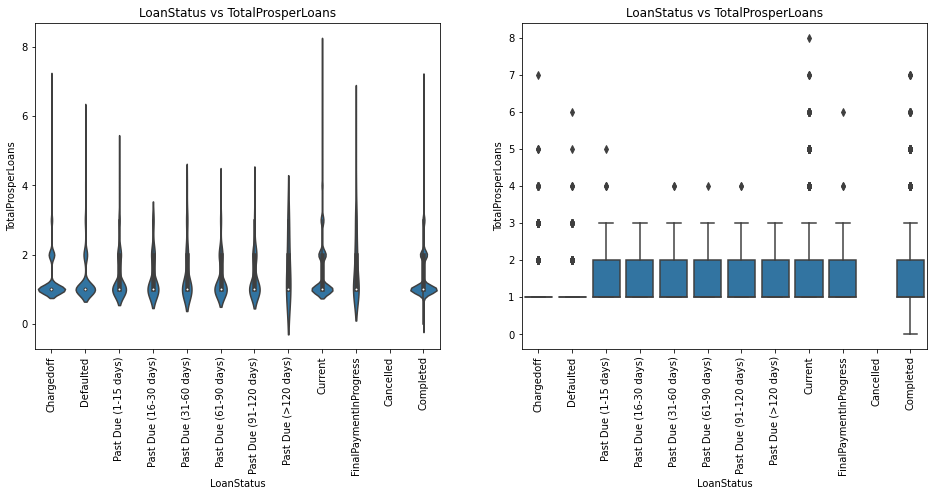

In [206]:
plt.figure(figsize = [16,6]);
plt.subplot(1, 2, 1)
sb.violinplot(data = loan_clean, x = 'LoanStatus', y = 'TotalProsperLoans', color = colors);
plt.title('LoanStatus vs TotalProsperLoans');
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)
sb.boxplot(data = loan_clean, x = 'LoanStatus', y = 'TotalProsperLoans', color = colors);
plt.title('LoanStatus vs TotalProsperLoans');
plt.xticks(rotation = 90);

### Observation

The violin and box plots don't depict a situation in which more prosper loans are associated with defaulting on a loan. The data across all levels of loan status are very similar in their distribution of values, quartile ranges, as well as overall range of values. Outliers are present across all levels but the data is very much similar.

# Multivariate Exploration

All of my questions have been answered through univariate or bivariate exploration. However, I am curious to see if anything stands out under a multivariate analysis. In this part I want to focus mainly on the interaction between BankCardUtilization, BorrowerAPR, CreditGrade, and TotalProsperLoans.

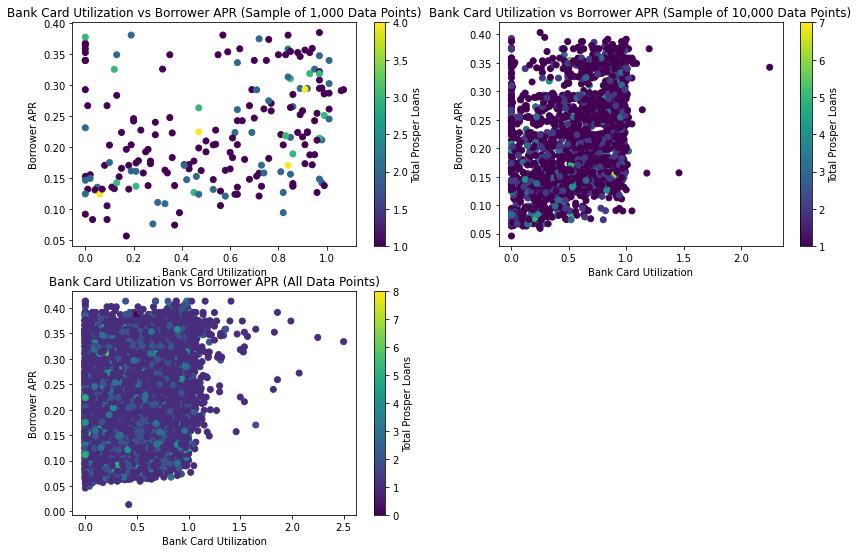

In [239]:
# Plots for BankCardUtilization, BorrowerAPR, and TotalProsperLoans

plt.figure(figsize = [14,14]);
plt.subplot(3, 2, 1)
plt.scatter(data = loan_clean.sample(1000), x = 'BankcardUtilization', y = 'BorrowerAPR', c = 'TotalProsperLoans');
plt.colorbar(label = 'Total Prosper Loans');
plt.xlabel('Bank Card Utilization');
plt.ylabel('Borrower APR');
plt.title('Bank Card Utilization vs Borrower APR (Sample of 1,000 Data Points)');

plt.subplot(3, 2, 2)
plt.scatter(data = loan_clean.sample(10000), x = 'BankcardUtilization', y = 'BorrowerAPR', c = 'TotalProsperLoans');
plt.colorbar(label = 'Total Prosper Loans');
plt.xlabel('Bank Card Utilization');
plt.ylabel('Borrower APR');
plt.title('Bank Card Utilization vs Borrower APR (Sample of 10,000 Data Points)');

plt.subplot(3, 2, 3)
plt.scatter(data = loan_clean, x = 'BankcardUtilization', y = 'BorrowerAPR', c = 'TotalProsperLoans');
plt.colorbar(label = 'Total Prosper Loans');
plt.xlabel('Bank Card Utilization');
plt.ylabel('Borrower APR');
plt.title('Bank Card Utilization vs Borrower APR (All Data Points)');

### Observation
Based on previous plots the interaction between BorrowerAPR and BankcardUtilization is positive, in that the higher a borrower's bank card utilization at the time of a credit report pull, the higher their APR will be. I used two varying sample sizes for the first two plots to depict a visual that was less crowded by all of the points. The last plot however depicts an extremely dense concentration of points within the range of 0 to 1 for bank card utilization. With more clear values and outliers further to the right in the overall distribution.

In previous assessments it was shown that the vast majority fall within the range of 0 to 1 for bank card utilization. Essentially indicating that prosper loans were given to individuals all along that spectrum.

In conjuction with previous assessment, these scatter plots serve as further confirmation that the vast majority of borrowers had zero to 2 prosper loans, with 1 prosper loan being the most common prosper loan amount (the mode).

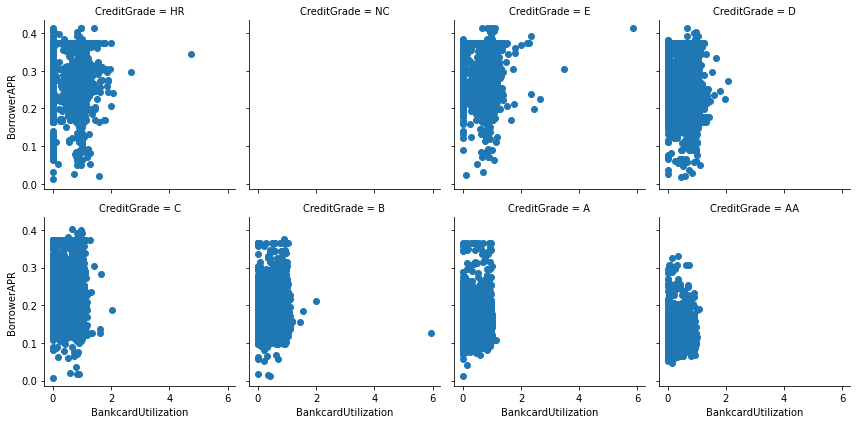

In [141]:
# Plots for BankCardUtilization, BorrowerAPR, and CreditGrade

g = sb.FacetGrid(data = loan_clean, col = 'CreditGrade', col_wrap = 4, margin_titles = True);
g.map(plt.scatter, 'BankcardUtilization', 'BorrowerAPR');

### Observation
Across all levels of credit grade, the distribution of values between **BankcardUtilization** and **BorrowerAPR** are very much identical, with the exception of borrowers who had no credit. There are some notable outliers however in grades HR, E, and B as well.

In [248]:
# Create slide-deck
!jupyter nbconvert loan_data_chad_morris.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook loan_data_chad_morris.ipynb to slides
[NbConvertApp] Writing 953225 bytes to loan_data_chad_morris.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/Chad/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/Chad/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/Users/Chad/opt/anaconda3/lib/pytho